# Building a Linear Regression from scratch

The goal of this notebook is to build a linear regression model from scratch. We will use the diamonds dataset to do this task. The diamonds dataset contains the prices and other attributes of almost 54,000 diamonds. This dataset is available in the ggplot2 package in R, but we will use the version of the dataset available in the pydataset package in Python.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# load data
diamonds = sns.load_dataset('diamonds')

# head
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# make a sample
diamonds_sample = diamonds.sample(300)

# Extracting feature and target
X = diamonds_sample['carat'].values
y = diamonds_sample['price'].values.reshape(-1,1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

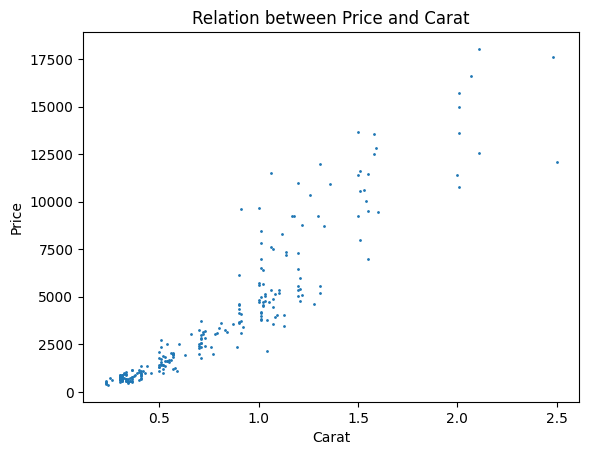

In [3]:
# plot the relation between X and y
plt.scatter(X_train, y_train, s=1)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Relation between Price and Carat')
plt.show()

## Learning about Gradient Descent

Gradient Descent is an optimization algorithm used to minimize a function iteratively. In the case of linear regression on the Boston Housing dataset, the function we're trying to minimize is the Mean Squared Error (MSE), which measures the average squared difference between the actual and predicted values.

### Key points: 

* Objective: The main goal of gradient descent in linear regression is to find the best parameters (coefficients and intercept) that provide the line of best fit for our data, thereby minimizing the MSE.

1. Hypothesis Function: In linear regression, our prediction is made using a linear equation, which is often represented as:
  $$\hat{y} = \beta_0 + \beta_1 x$$
  * Where:
    * $\hat{y}$ is the predicted value.
    * $x$ represents the feature.
    * $\beta_0$ is the y-intercept.
    * $\beta_1$ is the slope or coefficient of the feature.

In [4]:
# Hypothesis function
def hypothesis(X, beta0, beta1):
    return beta0 + beta1 * X

#### Cost Function (MSE):
This function measures how far off our predictions are from the actual values. Mathematically, it's given by:
  $$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
  * Where:
    * $N$ is the number of observations.
    * $y_i$ is the actual value for the i-th observation.
    * $\hat{y}_i$ is the predicted value for the i-th observation.


In [5]:
# Cost function
def compute_cost(X, y, beta0, beta1):
    m = len(y)
    predictions = hypothesis(X, beta0, beta1)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

#### **Gradient Descent Iterations**: 
In each iteration of gradient descent:
   - We compute the gradient of the cost function concerning each parameter. This gradient indicates the direction and rate of change of the cost function.
   - We then adjust the parameters (in this case, $\beta_0$ and $\beta_1$ in the direction of the negative gradient by a step determined by the learning rate. This step helps reduce the cost function.
   - This process is repeated for a specified number of iterations or until the cost function converges to a minimum value.


In [6]:
# Gradient Descent function
def gradient_descent(X, y, beta0, beta1, alpha, iterations):
    m = len(y)
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        h = hypothesis(X, beta0, beta1)
        
        beta1_gradient = -(1/m) * np.sum(X * (y - h))
        beta0_gradient = -(1/m) * np.sum(y - h)
        
        beta1 = beta1 - alpha * beta1_gradient
        beta0 = beta0 - alpha * beta0_gradient
        
        cost_history[iteration] = compute_cost(X, y, beta0, beta1)
    
    return beta0, beta1, cost_history

#### **Learning Rate**: 
It's a hyperparameter that determines the size of the steps we take in each iteration. A good learning rate will allow gradient descent to converge to the minimum of the cost function efficiently. If it's too high, we might overshoot the minimum, and if it's too low, the convergence might be very slow.

In [7]:
# Hyperparameters for gradient descent
alpha_diamonds = 0.000001
iterations_diamonds = 5000

# Initial values for beta0 and beta1
beta0_diamonds = 0
beta1_diamonds = 0

# Run gradient descent
beta0_diamonds_final, beta1_diamonds_final, cost_history_diamonds = gradient_descent(
    X_train, y_train, beta0_diamonds, beta1_diamonds, alpha_diamonds, iterations_diamonds)

### **Outcome**: 
After several iterations of gradient descent, we obtain optimal values for $\beta_0$ and $\beta_1$ that minimize the MSE. These values can then be used to make predictions on new data.

In summary, gradient descent is an iterative optimization process that adjusts the parameters of our linear regression model to minimize the mean squared error, thereby giving us the best line (or hyperplane in multiple dimensions) that fits our data.

In [8]:
# Predict function
def predict(X, beta0, beta1):
    return hypothesis(X, beta0, beta1)

# Predicting and evaluating on the test set
y_pred_diamonds = predict(X_test, beta0_diamonds_final, beta1_diamonds_final)
mse_diamonds = np.mean((y_pred_diamonds - y_test) ** 2)

In [9]:
print('MSE: {}'.format(mse_diamonds))
# print beta
print('beta0: {}'.format(beta0_diamonds_final))
print('beta1: {}'.format(beta1_diamonds_final))

MSE: 31114302.867755916
beta0: 2137.4406704680864
beta1: 1453.655000225425


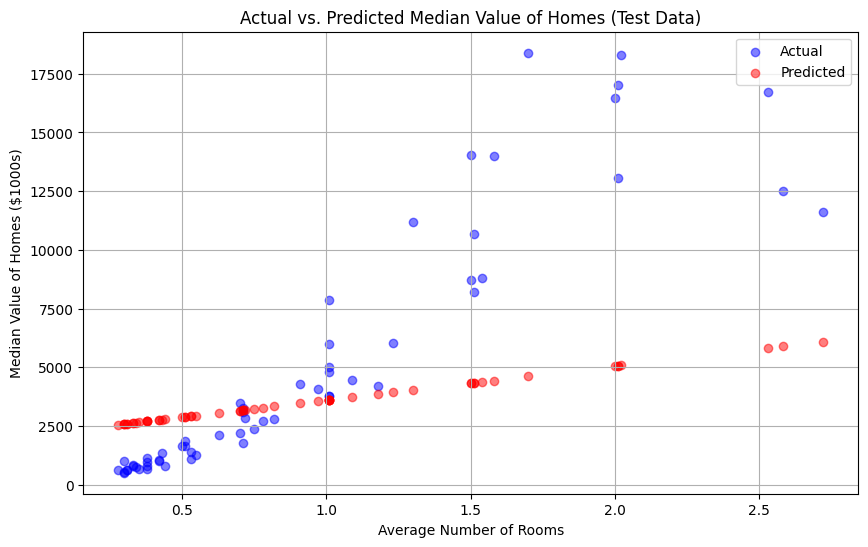

In [10]:
# Visualizing the actual vs. predicted median values of homes for the test set
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred_diamonds, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value of Homes ($1000s)')
plt.title('Actual vs. Predicted Median Value of Homes (Test Data)')
plt.legend()
plt.grid(True)
plt.show()